**Exercise 4.1** 

If $π$ is the equiprobable random policy, what is $q_π(11, down)$?
What is $q_π(7, down)$?

This is the value function $v_\pi(s)$ associated to the equiprobable policy $\pi$ :
| 0.0 | -14. | -20. | -22. |
|-----|------|------|------|
| -14.| -18. | -20. | -20. |
| -20.| -20. | -18. | -14. |
| -22.| -20. | -14. | -0.0 |

To compute $q_π(11, down)$ and $q_π(7, down)$, we can use the relation between $q_\pi(s,a)$ and $v_\pi(s)$ :
\begin{equation}
    q_\pi(s,a) = \sum_{s',r} p(s',r|s,a) (r + \gamma v_\pi(s'))
\end{equation}

In our case, actions deterministically determine the next state (i.e. the transitions $p(s'|s,a)$ are deterministic), the rewards are also deterministic, always -1 for all non-terminal states. So, $q_\pi(11,down)$ is simply :

\begin{aligned}
    q_\pi(11,down) &= p(S_T|11,down) (0 + \gamma v_\pi(S_T)) \\
    &= 1 \times 0 \\
    &= 0
\end{aligned}

where $S_T$ is the terminal state

And for $q_\pi(7,down)$ :

\begin{aligned}
    q_\pi(7,down) &= p(11|7,down) (-1 + \gamma v_\pi(11)) \\
    &= 1 \times (-1 + (-14)) \\
    &= -15
\end{aligned}

**Exercise 4.2**

Suppose a new state 15 is added to the gridworld just below
state 13, and its actions, left, up, right, and down, take the agent to states
12, 13, 14, and 15, respectively. Assume that the transitions from the original
states are unchanged. What, then, is $v_π(15)$ for the equiprobable random
policy?


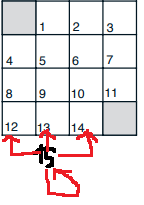

Using the Bellman equation : 
\begin{aligned}
    v_\pi(15) &= 0.25 (-1 + v_\pi(12)) + 0.25 (-1 + v_\pi(13)) + 0.25 (-1 + v_\pi(14)) + 0.25 (-1 + v_\pi(15)) \\
    &= 0.25 \times (-1 -22) + 0.25 (-1 -20) + 0.25 (-1 -14) + 0.25 (-1 + v_\pi(15)) \\
    &= -\frac{23}{4} - \frac{21}{4} - \frac{15}{4} - \frac{1}{4} + \frac{v_\pi(15)}{4} \\
    \Leftrightarrow \frac{3 v_\pi(15)}{4} &= -\frac{60}{4} \\
     \Leftrightarrow v_\pi(15) &= -20
\end{aligned}

Now suppose the dynamics of state 13 are also changed, such that
action down from state 13 takes the agent to the new state 15. What is $v_π(15)$
for the equiprobable random policy in this case?

We can write the bellman equation for $v_\pi(13)$ and $v_\pi(15)$ as a linear system of 2 equations and 2 unknowns : 
\begin{aligned}
    v_\pi(13) &= \frac{-1 + v_\pi(12)}{4} - \frac{-1 + v_\pi(9)}{4} - \frac{-1 + v_\pi(14)}{4} - \frac{-1 + v_\pi(15)}{4} \\
    v_\pi(15) &= \frac{-1 + v_\pi(12)}{4} - \frac{-1 + v_\pi(13)}{4} - \frac{-1 + v_\pi(14)}{4} - \frac{-1 + v_\pi(15)}{4} \\
    \Leftrightarrow v_\pi(13) &= -\frac{23}{4} - \frac{21}{4} - \frac{15}{4} -  \frac{-1 + v_\pi(15)}{4} \\
    v_\pi(15) &= -\frac{23}{4} - \frac{-1 + v_\pi(13)}{4} - \frac{15}{4} -  \frac{-1 + v_\pi(15)}{4} \\
    \Leftrightarrow v_\pi(13) &= -15 + \frac{v_\pi(15)}{4} \\
    3v_\pi(15) &= -40  + {v_\pi(13)} \\
    \Leftrightarrow v_\pi(13) &= -15 + \frac{v_\pi(15)}{4} \\
    3v_\pi(15) &= -40  - 15 + \frac{v_\pi(15)}{4} \\
    \Leftrightarrow v_\pi(13) &= -15 + \frac{v_\pi(15)}{4} \\
    \frac{11v_\pi(15)}{4} &= -55 \\
    \Leftrightarrow v_\pi(13) &= -20 \\
    v_\pi(15) &= -20 
\end{aligned}

**Exercise 4.3**

What are the equations analogous to (4.3), (4.4), and (4.5) for
the action-value function $q_π$ and its successive approximation by a sequence of
functions $q_0, q_1, q_2$, . . . ?


\begin{aligned}
    q_\pi(s,a) &= \sum_{s',r} p(s',r|s,a) \sum_{a'} \pi(a'|s') \Bigr[ r+\gamma q_\pi(s',a') \Bigr]
\end{aligned}

And therefore :

\begin{align}
    q_{k+1}(s,a) &= \sum_{s',r} p(s',r|s,a) \sum_{a'} \pi(a'|s') \Bigr[ r+\gamma q_k(s',a') \Bigr]
\end{align}

**Exercise 4.4** 

In some undiscounted episodic tasks there may be policies
for which eventual termination is not guaranteed. For example, in the grid
problem above it is possible to go back and forth between two states forever.
In a task that is otherwise perfectly sensible, $v_π(s)$ may be negative infinity
for some policies and states, in which case the algorithm for iterative policy
evaluation given in Figure 4.1 will not terminate. As a purely practical matter,
how might we amend this algorithm to assure termination even in this case?
Assume that eventual termination is guaranteed under the optimal policy.

Ideas :
- Slightly change the policy to an $\varepsilon$-greedy policy such that it has a small chance $\varepsilon$ to teleport randomly to another state
- 

**Exercise 4.5 (programming)**

Write a program for policy iteration and
re-solve Jack’s car rental problem with the following changes. One of Jack’s
employees at the first location rides a bus home each night and lives near
the second location. She is happy to shuttle one car to the second location
for free. Each additional car still costs $2, as do all cars moved in the other
direction. In addition, Jack has limited parking space at each location. If
more than 10 cars are kept overnight at a location (after any moving of cars),
then an additional cost of $4 must be incurred to use a second parking lot
(independent of how many cars are kept there). These sorts of nonlinearities
and arbitrary dynamics often occur in real problems and cannot easily be
handled by optimization methods other than dynamic programming. To check
your program, first replicate the results given for the original problem. If your
computer is too slow for the full problem, cut all the numbers of cars in half.

Working on it

**Exercise 4.6** 

How would policy iteration be defined for action values? Give
a complete algorithm for computing $q_∗$, analogous to Figure 4.3 for computing
$v_∗$. Please pay special attention to this exercise, because the ideas involved
will be used throughout the rest of the book.

**Pseudo Code**

```
1. Initialization
    Initialize Q(s,a) arbitrarily for all state-actions pairs (s,a)
    Initialize \pi arbitrarily
2. Policy Evaluation
    Update Q(s,a) according to equation (1) above for all state-action pairs (s,a) until convergence
3. Policy Improvement
    Update policy by select the best action for every state s according to our current table Q(s,a), that is argmax_a Q(s,a)
    if there is a change in policy, repeat step (2)-(3), otherwise stop the algorithm
```


**Exercise 4.7** 

Suppose you are restricted to considering only policies that are
$\varepsilon$-soft, meaning that the probability of selecting each action in each state, s,
is at least $\frac{\varepsilon}{|\mathcal{A}(s)|}$. Describe qualitatively the changes that would be required
in each of the steps 3, 2, and 1, in that order, of the policy iteration algorithm
for $v_∗$ (Figure 4.3).

**In step 3** : <br>
Replace $\pi(s) \leftarrow \argmax_{a} \sum_{s',r'} p(s',r|s,a) [r + \gamma V_\pi(s')]$ <br>
by : <br>
$a_{temp} \leftarrow \argmax_{a} \sum_{s',r'} p(s',r|s,a) [r + \gamma V_\pi(s')]$ <br>
$\pi(a_{temp}|s) \leftarrow 1-\varepsilon$ <br>
for a in $\mathcal{A(S)} : \pi(a|s) \leftarrow \pi(a|s) + \frac{\varepsilon}{|\mathcal{A}(s)|} $

**In step 2** <br>
Replace $V(s) \leftarrow \sum_{s',r'} p(s',r|s,a) [r + \gamma V_\pi(s')]$ <br>
by : <br>
$V(s) \leftarrow \sum_{a} \pi(a|s) \sum_{s',r'} p(s',r|s,a) [r + \gamma V_\pi(s')]$ <br>

**In step 1** <br>
Initialize an arbitrary stochastic policy, that is $\pi(a|s) \in [0,1]$ for every a and s such that the sum over all action for one state equals one.

**Exercice 4.8**

Why does the optimal policy for the gambler's problem have such a curious form ? In particular, for capital of 50 it bets it all on one flip, but for capital of 51 it does not. Why is this a good policy ?

My interpretation is since $p_h = 0.4 <0.5$, the gambler plays an unfair game and will lose his money in the long run (if there were no terminal states). When he has a capital of 50$, he has to bet it all because that's his best chance of actually winning the game. When he has a capital of 51$, he only bets 1$ so as to fall to 50$ if the coin comes up tail. If it comes up head, he ends up at 52$, and then bets 2$ following the same logic.

**Exercice 4.9 (programming)**

Implement value iteration for the gambler's problem and solve it for $p_h = 0.25$ and  $p_h = 0.55$. In programming, you may find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3.

In [1]:
from ValueIteration import value_iteration
from GamblerProblem import GamblerProblem
import matplotlib.pyplot as plt

p_head = 0.25
env = GamblerProblem(100, p_head)

In [2]:
V1, policy1 = value_iteration(env, 1e-10)

Optimal value found


In [3]:
p_head = 0.55
env = GamblerProblem(100, p_head)
V2, policy2 = value_iteration(env, 1e-10)

Optimal value found


For $p_h=0.25$

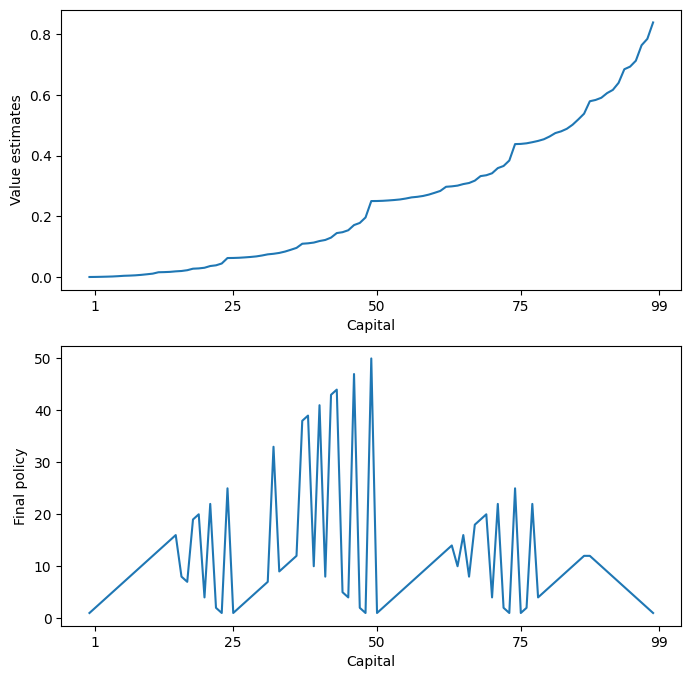

In [5]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(V1[1:-1])
plt.xticks([1, 25, 50, 75, 99])
plt.xlabel("Capital")
plt.ylabel("Value estimates")

plt.subplot(2,1,2)
plt.plot(policy1[1:-1])
plt.xticks([1, 25, 50, 75, 99])
plt.xlabel("Capital")
plt.ylabel("Final policy")
plt.show()

For $p_h=0.55$

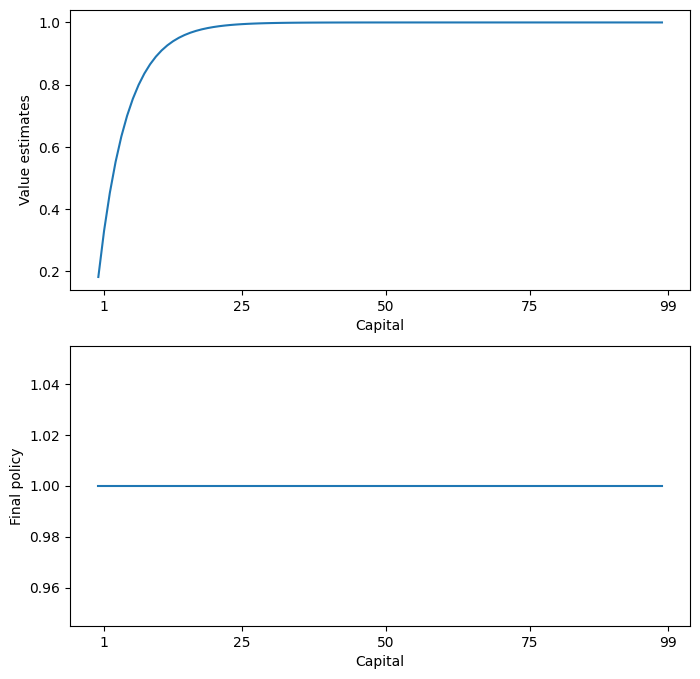

In [6]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(V2[1:-1])
plt.xticks([1, 25, 50, 75, 99])
plt.xlabel("Capital")
plt.ylabel("Value estimates")

plt.subplot(2,1,2)
plt.plot(policy2[1:-1])
plt.xticks([1, 25, 50, 75, 99])
plt.xlabel("Capital")
plt.ylabel("Final policy")
plt.show()